## Trabajo Practico 4

#### Materia: Vision por Computadora 1
#### Alumno: Lucas Rivela

In [1]:
import cv2 as cv
import math
import matplotlib.pyplot as plt
import numpy as np

#### Parte 1

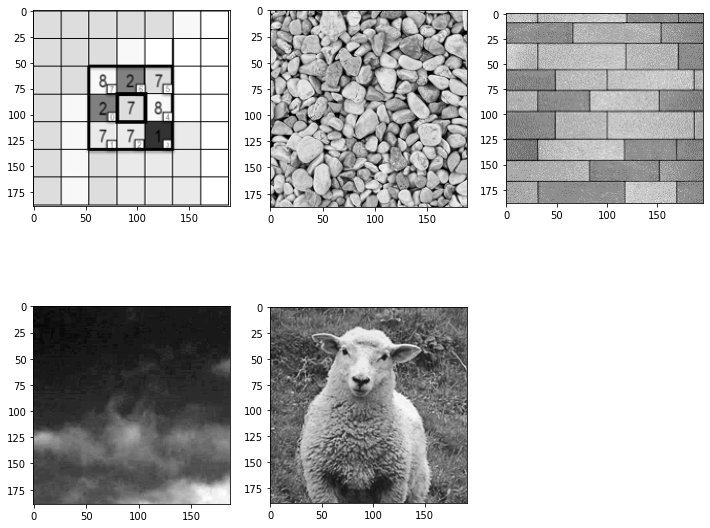

In [2]:
images_path = ['./images/Imagen1.png', './images/Imagen2.png', './images/Imagen3.png', './images/Imagen4.png', './images/Imagen5.png']
images = []
fig = plt.figure(figsize=(12,10))
for count, img in enumerate(images_path, 1):
    image = cv.imread(img, cv.IMREAD_GRAYSCALE)
    images.append(image)
    ax = fig.add_subplot(2, math.ceil(len(images_path)/2), count)
    ax.imshow(image, cmap='gray')
plt.show()

In [3]:
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        # If local neighbourhood pixel value is greater than or equal to center pixel values then set it to 1
        if img[x][y] >= center:
            new_value = 1
    except:
        # Exception is required when neighbourhood value of a center pixel value is null i.e. values present at boundaries.
        pass

    return new_value

In [6]:
def lbp_calculated_pixel(img, x, y):
    center = img[x][y]

    val_ar = []
    
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))  
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))

    # Now, we need to convert binary values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]

    val = 0

    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]

    return val

In [7]:
def getLBPimage(gray_image):
    img_lbp = np.zeros_like(gray_image, np.uint8)
    height, width = img_lbp.shape

    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(gray_image, i, j)

    return img_lbp            

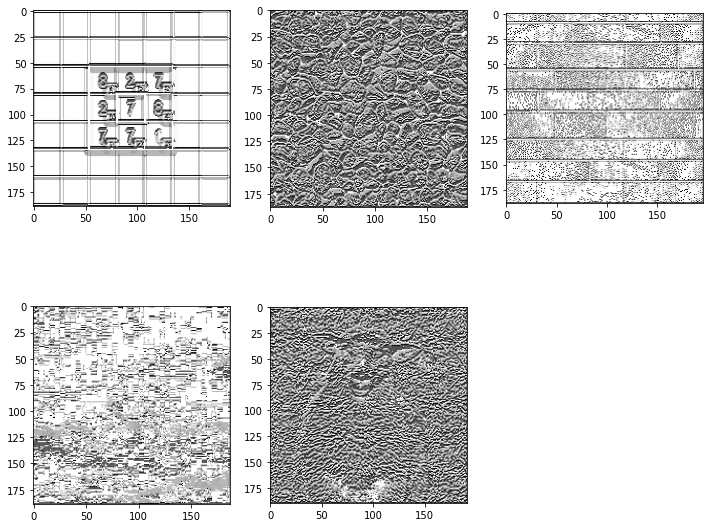

In [8]:
lbp_images = []
fig = plt.figure(figsize=(12,10))
for count, img in enumerate(images, 1):
    image = getLBPimage(img)
    ax = fig.add_subplot(2, math.ceil(len(images)/2), count)
    ax.imshow(image, cmap='gray')
    lbp_images.append(image)
plt.show()

#### Parte 2

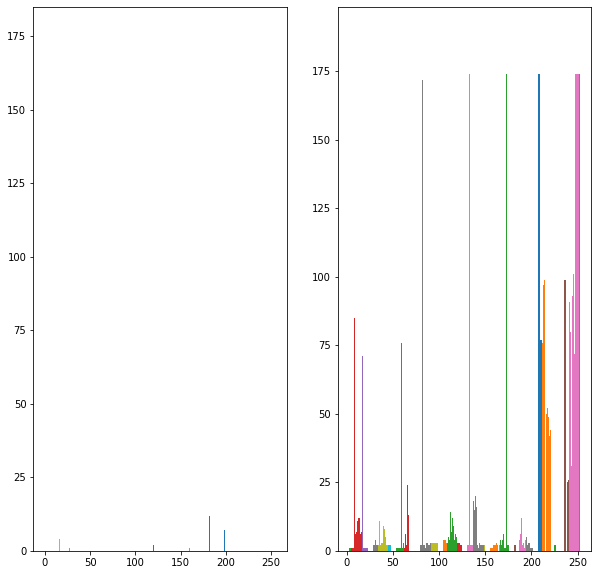

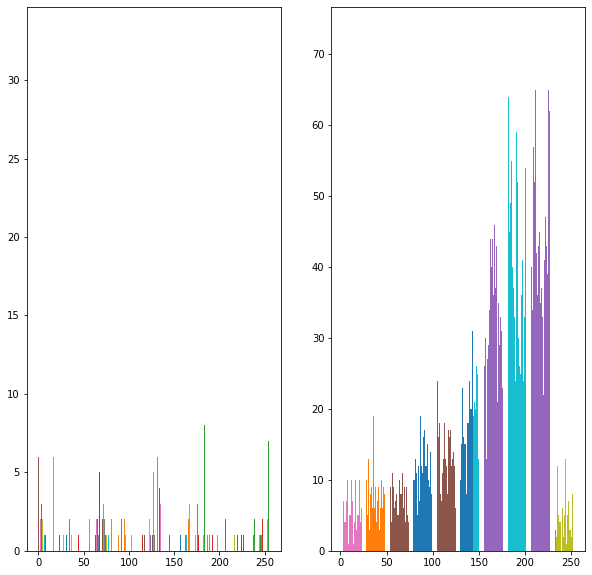

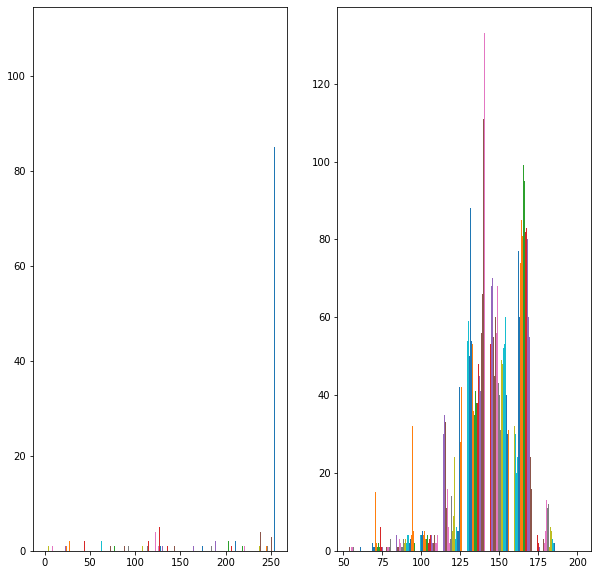

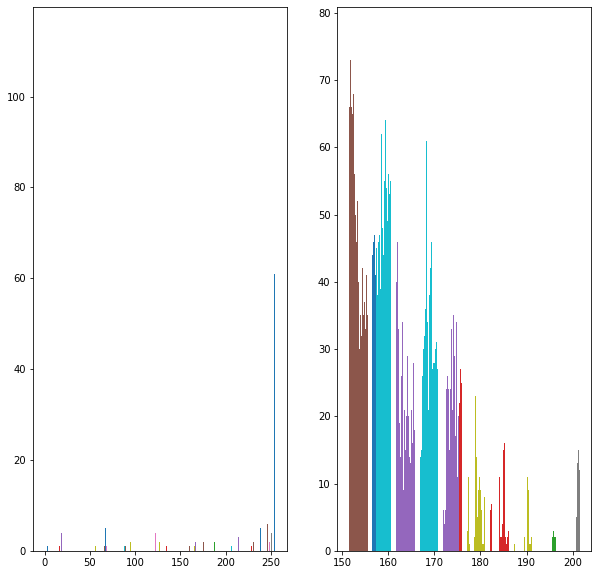

In [9]:
for i in range(0, len(lbp_images)-1):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,2,1)
    ax.hist(lbp_images[i], bins=2**8)
    ax2 = fig.add_subplot(1,2,2)
    ax2.hist(images[i])
    plt.show()